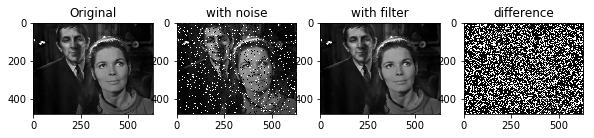

In [15]:
from scipy import ndimage as nimg
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from scipy import ndimage as nimg
import numpy as np
fig = plt.figure(figsize=(15,60))
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('shadow.jpg',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('shadow.jpg', noise_img)
output_img= cv2.imread('shadow.jpg',0)

imlen_new = nimg.median_filter(output_img, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)

plt.subplot(761)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(762)
plt.title('with noise')
plt.imshow(output_img,cmap='gray')
plt.subplot(763)
plt.title('with filter')
plt.imshow(imlen_new,cmap='gray')
plt.subplot(764)
plt.title('difference')
plt.imshow((imlen_new-output_img), cmap='gray')
plt.show()